In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('indian_liver_patient.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [4]:
df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].fillna(method = 'ffill')
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

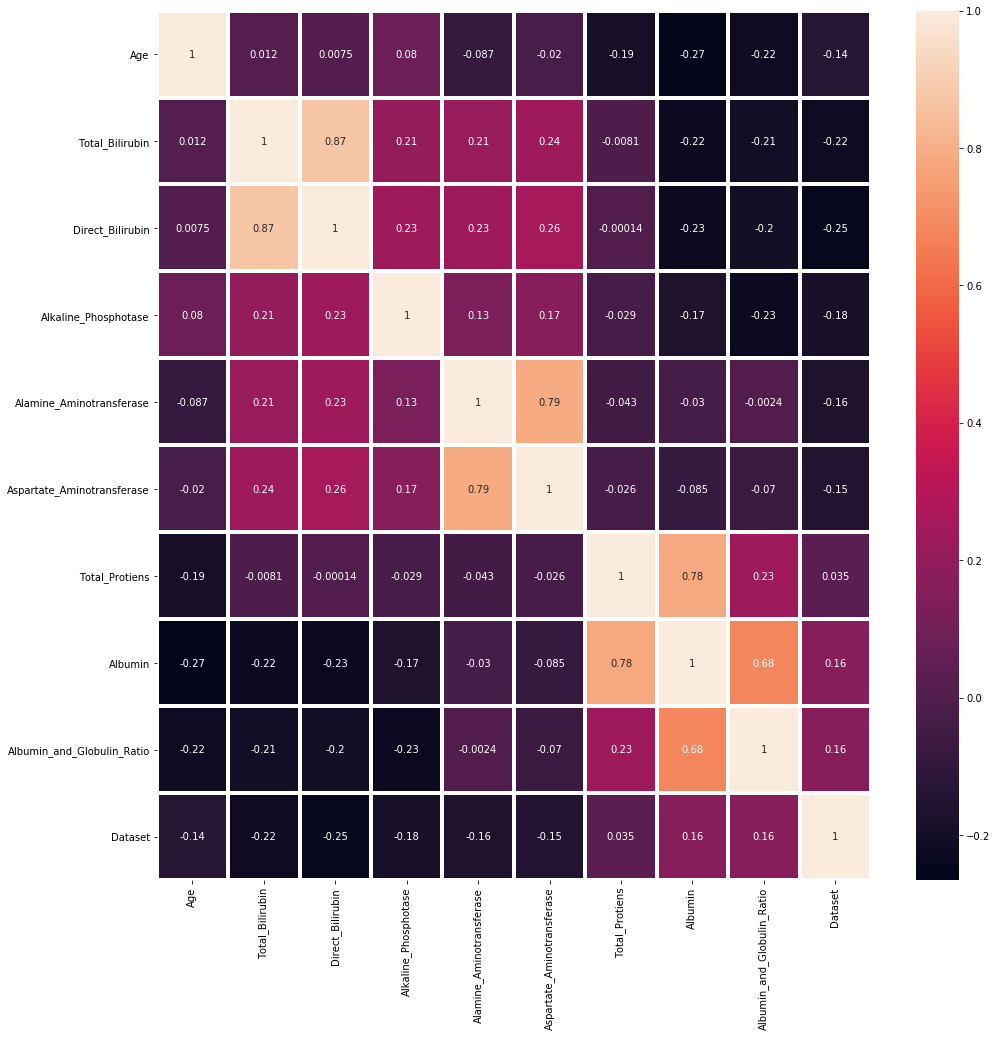

In [5]:
plt.figure(figsize=(16,16))
sn.heatmap(df.corr(),annot=True,linewidths=3)

In [6]:
for i in df.columns:
    print(f'feature {i} has {df[i].unique()}features')
    print("-"*75)

feature Age has [65 62 58 72 46 26 29 17 55 57 64 74 61 25 38 33 40 51 63 34 20 84 52 30
 48 47 45 42 50 85 35 21 32 31 54 37 66 60 19 75 68 70 49 14 13 18 39 27
 36 24 28 53 15 56 44 41  7 22  8  6  4 43 23 12 69 16 78 11 73 67 10 90]features
---------------------------------------------------------------------------
feature Gender has ['Female' 'Male']features
---------------------------------------------------------------------------
feature Total_Bilirubin has [ 0.7 10.9  7.3  1.   3.9  1.8  0.9  0.6  2.7  1.1  1.6  2.2  2.9  6.8
  1.9  4.1  6.2  4.   2.6  1.3 14.2  1.4  2.4 18.4  3.1  8.9  0.8  2.8
  2.   5.7  8.6  5.8  5.2  3.8  6.6  0.5  5.3  3.2  1.2 12.7 15.9 18.
 23.  22.7  1.7  3.  11.3  4.7  4.2  3.5  5.9  8.7 11.  11.5  4.5 75.
 22.8 14.1 14.8 10.6  8.   1.5  2.1  6.3  2.3 27.2  2.5  3.6 30.5 16.4
 14.5 18.5 23.2  3.7  3.3  7.1  6.7 22.6  7.5  5.   4.9  8.2  0.4  7.4
 23.3  7.9  3.4 19.8 32.6 17.7 20.  26.3  4.4  9.4 30.8 19.6 15.8  5.5
 20.2 27.7 11.1 10.2 42.8 15.2 16.6 

In [7]:
df['Gender'] = pd.get_dummies(df['Gender'])

In [8]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [9]:
data = df.copy()

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,cross_val_score
from sklearn import metrics


In [11]:
test = data['Dataset']

train = data.drop(['Dataset'],axis = 1)


In [12]:
mm = MinMaxScaler()
train_scaled = mm.fit_transform(train)
train_scaled

array([[0.70930233, 1.        , 0.00402145, ..., 0.5942029 , 0.52173913,
        0.24      ],
       [0.6744186 , 0.        , 0.14075067, ..., 0.69565217, 0.5       ,
        0.176     ],
       [0.6744186 , 0.        , 0.0924933 , ..., 0.62318841, 0.52173913,
        0.236     ],
       ...,
       [0.55813953, 0.        , 0.00536193, ..., 0.53623188, 0.5       ,
        0.28      ],
       [0.31395349, 0.        , 0.01206434, ..., 0.5942029 , 0.54347826,
        0.28      ],
       [0.39534884, 0.        , 0.0080429 , ..., 0.66666667, 0.76086957,
        0.48      ]])

In [13]:
params = {
    'n_estimators':[int(x) for x in np.linspace(start=1,stop=1200,num=10)],
    'criterion' :['gini','entropy'],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[2,5,10],
    'max_depth' : [int(x) for x in np.linspace(start=1,stop = 30,num=5)],
    'max_features':['auto','sqrt']
}

In [14]:
rf_est = RandomizedSearchCV(RandomForestClassifier(),param_distributions=params,cv = 5,scoring='accuracy',return_train_score=False,
                           n_iter=10,verbose = 2)
rf_est.fit(train,test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=267, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=8, criterion=entropy 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=267, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=8, criterion=entropy, total=   1.0s
[CV] n_estimators=267, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=8, criterion=entropy 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=267, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=8, criterion=entropy, total=   1.0s
[CV] n_estimators=267, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=8, criterion=entropy 
[CV]  n_estimators=267, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=8, criterion=entropy, total=   1.0s
[CV] n_estimators=267, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=8, criterion=entropy 
[CV]  n_estimators=267, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=8, criterion=entropy, total=   1.8s
[CV] n_estimators=267, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=8, criterion=entropy 
[CV]  n_estimators=267, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=8, criterion=entropy, total=   0.8s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=22, criterion=gini 
[CV]  n_estim

[CV]  n_estimators=134, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, criterion=gini, total=   0.4s
[CV] n_estimators=134, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, criterion=gini 
[CV]  n_estimators=134, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, criterion=gini, total=   0.8s
[CV] n_estimators=134, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, criterion=gini 
[CV]  n_estimators=134, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, criterion=gini, total=   0.6s
[CV] n_estimators=134, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, criterion=gini 
[CV]  n_estimators=134, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, criterion=gini, total=   0.8s
[CV] n_estimators=134, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, criterion=gini 
[CV]  n_estimators=134, min_samples_

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [15]:
rf_est.best_score_

0.7135573239021515

In [16]:
rf_est.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=1, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=667,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
params1 = {
    #'n_estimators':[int(x) for x in np.linspace(start=1,stop=1200,num=10)],
    'criterion' :['gini','entropy'],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[2,5,10],
    'max_depth' : [int(x) for x in np.linspace(start=1,stop = 30,num=5)],
    #'max_features':['auto','sqrt']
}

In [19]:
dt_est = RandomizedSearchCV(DecisionTreeClassifier(),param_distributions=params1,cv = 5,n_iter=10,scoring='accuracy',verbose = 2,return_train_score=False)
dt_est.fit(train,test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] min_samples_split=10, min_samples_leaf=5, max_depth=1, criterion=gini 
[CV]  min_samples_split=10, min_samples_leaf=5, max_depth=1, criterion=gini, total=   0.0s
[CV] min_samples_split=10, min_samples_leaf=5, max_depth=1, criterion=gini 
[CV]  min_samples_split=10, min_samples_leaf=5, max_depth=1, criterion=gini, total=   0.0s
[CV] min_samples_split=10, min_samples_leaf=5, max_depth=1, criterion=gini 
[CV]  min_samples_split=10, min_samples_leaf=5, max_depth=1, criterion=gini, total=   0.0s
[CV] min_samples_split=10, min_samples_leaf=5, max_depth=1, criterion=gini 
[CV]  min_samples_split=10, min_samples_leaf=5, max_depth=1, criterion=gini, total=   0.0s
[CV] min_samples_split=10, min_samples_leaf=5, max_depth=1, criterion=gini 
[CV]  min_samples_split=10, min_samples_leaf=5, max_depth=1, criterion=gini, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=10, max_depth=22, criterion=entropy 
[CV]  min_samples_split=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] min_samples_split=5, min_samples_leaf=10, max_depth=1, criterion=entropy 
[CV]  min_samples_split=5, min_samples_leaf=10, max_depth=1, criterion=entropy, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=10, max_depth=1, criterion=entropy 
[CV]  min_samples_split=5, min_samples_leaf=10, max_depth=1, criterion=entropy, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=10, max_depth=1, criterion=entropy 
[CV]  min_samples_split=5, min_samples_leaf=10, max_depth=1, criterion=entropy, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=10, max_depth=1, criterion=entropy 
[CV]  min_samples_split=5, min_samples_leaf=10, max_depth=1, criterion=entropy, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=10, max_depth=1, criterion=entropy 
[CV]  min_samples_split=5, min_samples_leaf=10, max_depth=1, criterion=entropy, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=10, max_depth=15, criterion=entropy 
[CV]  min_samples_split=2, min_samples_leaf=10, max_de

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [20]:
dt_est.best_score_

0.7135573239021515

In [24]:
model_params  = {
    'logistic':{
        'model': LogisticRegression(),
        'params':{
            'C':[0.25,0.50,0.75,1.0],
        }
    },
    'SVM':{
        'model':SVC(gamma='auto'),
        'params':{
            'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
            'C':[0.25,0.50,0.75,1.0],
        }
    },
    'K-neighbors':{
        'model':KNeighborsClassifier(metric='minkowski'),
        'params':{
            'n_neighbors':[int(x) for x in np.linspace(start=1,stop=12,num=3)],
            'leaf_size' :[int(x) for x in np.linspace(start=1,stop=30,num=5)],  
        }
    }
}

In [26]:
scores = []
for model_name,mp in model_params.items():
    clf = RandomizedSearchCV(mp['model'],param_distributions=mp['params'],cv=5,return_train_score=False,
                            n_iter=10,scoring='accuracy',verbose=2)
    clf.fit(train_scaled,test)
    scores.append({
        'model_name':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_,
    })

C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=0.25 ..........................................................
[CV] ........................................... C=0.25, total=   0.0s
[CV] C=0.25 ..........................................................
[CV] ........................................... C=0.25, total=   0.0s
[CV] C=0.25 ..........................................................
[CV] ........................................... C=0.25, total=   0.0s
[CV] C=0.25 ..........................................................
[CV] ........................................... C=0.25, total=   0.0s
[CV] C=0.25 ..........................................................
[CV] ........................................... C=0.25, total=   0.0s
[CV] C=0.5 ...........................................................
[CV] ............................................ C=0.5, total=   0.0s
[CV] C=0.5 ...........................................................
[CV] ............

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................ kernel=sigmoid, C=0.5, total=   0.0s
[CV] kernel=sigmoid, C=0.5 ...........................................
[CV] ............................ kernel=sigmoid, C=0.5, total=   0.0s
[CV] kernel=sigmoid, C=0.5 ...........................................
[CV] ............................ kernel=sigmoid, C=0.5, total=   0.0s
[CV] kernel=sigmoid, C=0.5 ...........................................
[CV] ............................ kernel=sigmoid, C=0.5, total=   0.0s
[CV] kernel=sigmoid, C=0.5 ...........................................
[CV] ............................ kernel=sigmoid, C=0.5, total=   0.0s
[CV] kernel=linear, C=1.0 ............................................
[CV] ............................. kernel=linear, C=1.0, total=   0.0s
[CV] kernel=linear, C=1.0 ............................................
[CV] ............................. kernel=linear, C=1.0, total=   0.0s
[CV] kernel=linear, C=1.0 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] n_neighbors=1, leaf_size=8 ......................................
[CV] ....................... n_neighbors=1, leaf_size=8, total=   0.1s
[CV] n_neighbors=1, leaf_size=8 ......................................
[CV] ....................... n_neighbors=1, leaf_size=8, total=   0.0s
[CV] n_neighbors=1, leaf_size=8 ......................................
[CV] ....................... n_neighbors=1, leaf_size=8, total=   0.0s
[CV] n_neighbors=1, leaf_size=8 ......................................
[CV] ....................... n_neighbors=1, leaf_size=8, total=   0.0s
[CV] n_neighbors=1, leaf_size=8 ......................................
[CV] ....................... n_neighbors=1, leaf_size=8, total=   0.0s
[CV] n_neighbors=6, leaf_size=8 ......................................
[CV] ....................... n_neighbors=6, leaf_size=8, total=   0.0s
[CV] n_neighbors=6, leaf_size=8 ......................................
[CV] ....................... n_neighbors=6, leaf_size=8, total=   0.0s
[CV] n

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.1s finished


In [27]:
score_list = pd.DataFrame(scores,columns=['model_name','best_score','best_params'])
score_list

,model_name,best_score,best_params
0,logistic,0.718715,{'C': 1.0}
1,SVM,0.713557,"{'kernel': 'sigmoid', 'C': 0.5}"
2,K-neighbors,0.672429,"{'n_neighbors': 6, 'leaf_size': 8}"


### RF ON SCALED DATA

In [29]:
tree_params = {
    'Random_forest':{
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators':[int(x) for x in np.linspace(start=1,stop=1200,num=10)],
            'criterion' :['gini','entropy'],
            'min_samples_split':[2,5,10],
            'min_samples_leaf':[2,5,10],
            'max_depth' : [int(x) for x in np.linspace(start=1,stop = 30,num=5)],
            'max_features':['auto','sqrt']
        }
    },
    'Dtree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion' :['gini','entropy'],
            'min_samples_split':[2,5,10],
            'min_samples_leaf':[2,5,10],
            'max_depth' : [int(x) for x in np.linspace(start=1,stop = 30,num=5)],
        }
    }
    
}

In [31]:
scores1 = []
for model_name,mp in tree_params.items():
    clf = RandomizedSearchCV(mp['model'],param_distributions=mp['params'],cv=5,return_train_score=False,
                            n_iter=10,scoring='accuracy',verbose=2)
    clf.fit(train_scaled,test)
    scores1.append({
        'model_name':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_,
    })

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=134, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=8, criterion=entropy 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=134, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=8, criterion=entropy, total=   0.6s
[CV] n_estimators=134, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=8, criterion=entropy 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  n_estimators=134, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=8, criterion=entropy, total=   0.5s
[CV] n_estimators=134, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=8, criterion=entropy 
[CV]  n_estimators=134, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=8, criterion=entropy, total=   0.8s
[CV] n_estimators=134, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=8, criterion=entropy 
[CV]  n_estimators=134, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=8, criterion=entropy, total=   0.9s
[CV] n_estimators=134, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=8, criterion=entropy 
[CV]  n_estimators=134, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=8, criterion=entropy, total=   0.8s
[CV] n_estimators=134, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=1, criterion=gini 
[CV]  n_estimators=134,

[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=1, criterion=gini, total=   3.0s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=1, criterion=gini 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=1, criterion=gini, total=   3.5s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=1, criterion=gini 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=1, criterion=gini, total=   3.5s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=1, criterion=gini 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=1, criterion=gini, total=   3.8s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=1, criterion=gini 
[CV]  n_estimators=1200, min_samples

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.3min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] min_samples_split=5, min_samples_leaf=10, max_depth=8, criterion=gini 
[CV]  min_samples_split=5, min_samples_leaf=10, max_depth=8, criterion=gini, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=10, max_depth=8, criterion=gini 
[CV]  min_samples_split=5, min_samples_leaf=10, max_depth=8, criterion=gini, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=10, max_depth=8, criterion=gini 
[CV]  min_samples_split=5, min_samples_leaf=10, max_depth=8, criterion=gini, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=10, max_depth=8, criterion=gini 
[CV]  min_samples_split=5, min_samples_leaf=10, max_depth=8, criterion=gini, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=10, max_depth=8, criterion=gini 
[CV]  min_samples_split=5, min_samples_leaf=10, max_depth=8, criterion=gini, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=10, max_depth=1, criterion=entropy 
[CV]  min_samples_split=2

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  min_samples_split=10, min_samples_leaf=10, max_depth=30, criterion=entropy, total=   0.0s
[CV] min_samples_split=10, min_samples_leaf=10, max_depth=30, criterion=entropy 
[CV]  min_samples_split=10, min_samples_leaf=10, max_depth=30, criterion=entropy, total=   0.0s
[CV] min_samples_split=10, min_samples_leaf=2, max_depth=22, criterion=entropy 
[CV]  min_samples_split=10, min_samples_leaf=2, max_depth=22, criterion=entropy, total=   0.0s
[CV] min_samples_split=10, min_samples_leaf=2, max_depth=22, criterion=entropy 
[CV]  min_samples_split=10, min_samples_leaf=2, max_depth=22, criterion=entropy, total=   0.0s
[CV] min_samples_split=10, min_samples_leaf=2, max_depth=22, criterion=entropy 
[CV]  min_samples_split=10, min_samples_leaf=2, max_depth=22, criterion=entropy, total=   0.0s
[CV] min_samples_split=10, min_samples_leaf=2, max_depth=22, criterion=entropy 
[CV]  min_samples_split=10, min_samples_leaf=2, max_depth=22, criterion=entropy, total=   0.0s
[CV] min_samples_split=10, 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.3s finished


In [32]:
tree_list = pd.DataFrame(scores1,columns=['model_name','best_score','best_params'])
tree_list

,model_name,best_score,best_params
0,Random_forest,0.713557,"{'n_estimators': 134, 'min_samples_split': 2, ..."
1,Dtree,0.713557,"{'min_samples_split': 2, 'min_samples_leaf': 1..."


In [39]:
scores2 = []
for model_name,mp in model_params.items():
    clf = GridSearchCV(mp['model'],param_grid=mp['params'],cv=5,return_train_score=False,
                           scoring='accuracy',verbose=2)
    clf.fit(train_scaled,test)
    scores2.append({
        'model_name':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_,
    })

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=0.25 ..........................................................
[CV] ........................................... C=0.25, total=   0.0s
[CV] C=0.25 ..........................................................
[CV] ........................................... C=0.25, total=   0.0s
[CV] C=0.25 ..........................................................
[CV] ........................................... C=0.25, total=   0.0s
[CV] C=0.25 ..........................................................
[CV] ........................................... C=0.25, total=   0.0s
[CV] C=0.25 ..........................................................
[CV] ........................................... C=0.25, total=   0.0s
[CV] C=0.5 ...........................................................
[CV] ............................................ C=0.5, total=   0.0s
[CV] C=0.5 ...........................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................................ C=0.5, total=   0.0s
[CV] C=0.75 ..........................................................
[CV] ........................................... C=0.75, total=   0.0s
[CV] C=0.75 ..........................................................
[CV] ........................................... C=0.75, total=   0.0s
[CV] C=0.75 ..........................................................
[CV] ........................................... C=0.75, total=   0.0s
[CV] C=0.75 ..........................................................
[CV] ........................................... C=0.75, total=   0.0s
[CV] C=0.75 ..........................................................
[CV] ........................................... C=0.75, total=   0.0s
[CV] C=1.0 ...........................................................
[CV] ............................................ C=1.0, total=   0.0s
[CV] C=1.0 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................... C=0.25, kernel=rbf, total=   0.0s
[CV] C=0.25, kernel=rbf ..............................................
[CV] ............................... C=0.25, kernel=rbf, total=   0.0s
[CV] C=0.25, kernel=rbf ..............................................
[CV] ............................... C=0.25, kernel=rbf, total=   0.0s
[CV] C=0.25, kernel=rbf ..............................................
[CV] ............................... C=0.25, kernel=rbf, total=   0.0s
[CV] C=0.25, kernel=sigmoid ..........................................
[CV] ........................... C=0.25, kernel=sigmoid, total=   0.0s
[CV] C=0.25, kernel=sigmoid ..........................................
[CV] ........................... C=0.25, kernel=sigmoid, total=   0.0s
[CV] C=0.25, kernel=sigmoid ..........................................
[CV] ........................... C=0.25, kernel=sigmoid, total=   0.0s
[CV] C=0.25, kernel=sigmoid ..........................................
[CV] .

[CV] ................................ C=1.0, kernel=rbf, total=   0.0s
[CV] C=1.0, kernel=rbf ...............................................
[CV] ................................ C=1.0, kernel=rbf, total=   0.0s
[CV] C=1.0, kernel=rbf ...............................................
[CV] ................................ C=1.0, kernel=rbf, total=   0.0s
[CV] C=1.0, kernel=rbf ...............................................
[CV] ................................ C=1.0, kernel=rbf, total=   0.0s
[CV] C=1.0, kernel=sigmoid ...........................................
[CV] ............................ C=1.0, kernel=sigmoid, total=   0.0s
[CV] C=1.0, kernel=sigmoid ...........................................
[CV] ............................ C=1.0, kernel=sigmoid, total=   0.0s
[CV] C=1.0, kernel=sigmoid ...........................................
[CV] ............................ C=1.0, kernel=sigmoid, total=   0.0s
[CV] C=1.0, kernel=sigmoid ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] leaf_size=1, n_neighbors=6 ......................................
[CV] ....................... leaf_size=1, n_neighbors=6, total=   0.0s
[CV] leaf_size=1, n_neighbors=6 ......................................
[CV] ....................... leaf_size=1, n_neighbors=6, total=   0.0s
[CV] leaf_size=1, n_neighbors=6 ......................................
[CV] ....................... leaf_size=1, n_neighbors=6, total=   0.0s
[CV] leaf_size=1, n_neighbors=12 .....................................
[CV] ...................... leaf_size=1, n_neighbors=12, total=   0.0s
[CV] leaf_size=1, n_neighbors=12 .....................................
[CV] ...................... leaf_size=1, n_neighbors=12, total=   0.0s
[CV] leaf_size=1, n_neighbors=12 .....................................
[CV] ...................... leaf_size=1, n_neighbors=12, total=   0.0s
[CV] leaf_size=1, n_neighbors=12 .....................................
[CV] ...................... leaf_size=1, n_neighbors=12, total=   0.0s
[CV] 

[CV] ..................... leaf_size=30, n_neighbors=12, total=   0.0s


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.4s finished


In [40]:
score_list2 = pd.DataFrame(scores2,columns=['model_name','best_score','best_params'])
score_list2

,model_name,best_score,best_params
0,logistic,0.718715,{'C': 1.0}
1,SVM,0.713557,"{'C': 0.25, 'kernel': 'linear'}"
2,K-neighbors,0.672429,"{'leaf_size': 1, 'n_neighbors': 6}"


In [ ]:
LogisticRegression()
LogisticRegression(
    penalty='l2',
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,

In [46]:
logi_params = {
    'C':[0.25,0.50,0.75,1.0],
    'max_iter':[int(x) for x in np.linspace(start=1,stop=200,num=10)],
    'tol':[1e-25,1e-20,1e-15,1e-10,1e-5,1e-3,0.25,0.50,0.75,1.0],
    'solver':['lbfgs','liblinear','saga'],
}

In [47]:
logi = RandomizedSearchCV(LogisticRegression(),param_distributions=logi_params,cv = 5,return_train_score=False,n_iter=10,
                         verbose=2,scoring='accuracy')
logi.fit(train_scaled,test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] tol=1e-05, solver=lbfgs, max_iter=1, C=0.75 .....................
[CV] ...... tol=1e-05, solver=lbfgs, max_iter=1, C=0.75, total=   0.0s
[CV] tol=1e-05, solver=lbfgs, max_iter=1, C=0.75 .....................
[CV] ...... tol=1e-05, solver=lbfgs, max_iter=1, C=0.75, total=   0.0s
[CV] tol=1e-05, solver=lbfgs, max_iter=1, C=0.75 .....................
[CV] ...... tol=1e-05, solver=lbfgs, max_iter=1, C=0.75, total=   0.0s
[CV] tol=1e-05, solver=lbfgs, max_iter=1, C=0.75 .....................
[CV] ...... tol=1e-05, solver=lbfgs, max_iter=1, C=0.75, total=   0.0s
[CV] tol=1e-05, solver=lbfgs, max_iter=1, C=0.75 .....................
[CV] ...... tol=1e-05, solver=lbfgs, max_iter=1, C=0.75, total=   0.0s
[CV] tol=1e-05, solver=liblinear, max_iter=133, C=0.75 ...............
[CV]  tol=1e-05, solver=liblinear, max_iter=133, C=0.75, total=   0.0s
[CV] tol=1e-05, solver=liblinear, max_iter=133, C=0.75 ...............
[CV]  tol=1e-05,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    ht


[CV] tol=0.001, solver=liblinear, max_iter=67, C=0.5 .................
[CV] .. tol=0.001, solver=liblinear, max_iter=67, C=0.5, total=   0.0s
[CV] tol=0.001, solver=liblinear, max_iter=67, C=0.5 .................
[CV] .. tol=0.001, solver=liblinear, max_iter=67, C=0.5, total=   0.0s
[CV] tol=0.001, solver=liblinear, max_iter=67, C=0.5 .................
[CV] .. tol=0.001, solver=liblinear, max_iter=67, C=0.5, total=   0.0s
[CV] tol=0.001, solver=liblinear, max_iter=67, C=0.5 .................
[CV] .. tol=0.001, solver=liblinear, max_iter=67, C=0.5, total=   0.0s
[CV] tol=0.001, solver=liblinear, max_iter=67, C=0.5 .................
[CV] .. tol=0.001, solver=liblinear, max_iter=67, C=0.5, total=   0.0s
[CV] tol=0.25, solver=lbfgs, max_iter=111, C=0.75 ....................
[CV] ..... tol=0.25, solver=lbfgs, max_iter=111, C=0.75, total=   0.0s
[CV] tol=0.25, solver=lbfgs, max_iter=111, C=0.75 ....................
[CV] ..... tol=0.25, solver=lbfgs, max_iter=111, C=0.75, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1.0],
                                        'max_iter': [1, 23, 45, 67, 89, 111,
                                                     133, 155, 177, 200],
                                        'solver': ['lbfgs', '

In [48]:
logi.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=177,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1e-15, verbose=0,
                   warm_start=False)

In [49]:
logi.best_score_

0.7187150014736222

In [50]:
logi1 = RandomizedSearchCV(LogisticRegression(),param_distributions=logi_params,cv = 5,return_train_score=False,n_iter=10,
                         verbose=2,scoring='accuracy')
logi1.fit(train,test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] tol=1e-20, solver=liblinear, max_iter=67, C=0.25 ................
[CV] . tol=1e-20, solver=liblinear, max_iter=67, C=0.25, total=   0.0s
[CV] tol=1e-20, solver=liblinear, max_iter=67, C=0.25 ................
[CV] . tol=1e-20, solver=liblinear, max_iter=67, C=0.25, total=   0.0s
[CV] tol=1e-20, solver=liblinear, max_iter=67, C=0.25 ................
[CV] . tol=1e-20, solver=liblinear, max_iter=67, C=0.25, total=   0.0s
[CV] tol=1e-20, solver=liblinear, max_iter=67, C=0.25 ................
[CV] . tol=1e-20, solver=liblinear, max_iter=67, C=0.25, total=   0.0s
[CV] tol=1e-20, solver=liblinear, max_iter=67, C=0.25 ................
[CV] . tol=1e-20, solver=liblinear, max_iter=67, C=0.25, total=   0.0s
[CV] tol=1.0, solver=saga, max_iter=133, C=0.75 ......................
[CV] ....... tol=1.0, solver=saga, max_iter=133, C=0.75, total=   0.0s
[CV] tol=1.0, solver=saga, max_iter=133, C=0.75 ......................
[CV] ....... tol

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    ht

[CV] .... tol=1e-20, solver=lbfgs, max_iter=155, C=0.25, total=   0.1s
[CV] tol=1e-20, solver=lbfgs, max_iter=155, C=0.25 ...................
[CV] .... tol=1e-20, solver=lbfgs, max_iter=155, C=0.25, total=   0.1s
[CV] tol=1e-20, solver=lbfgs, max_iter=155, C=0.25 ...................
[CV] .... tol=1e-20, solver=lbfgs, max_iter=155, C=0.25, total=   0.1s
[CV] tol=1e-20, solver=lbfgs, max_iter=155, C=0.25 ...................
[CV] .... tol=1e-20, solver=lbfgs, max_iter=155, C=0.25, total=   0.1s
[CV] tol=1e-20, solver=lbfgs, max_iter=155, C=0.25 ...................


C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/sta

[CV] .... tol=1e-20, solver=lbfgs, max_iter=155, C=0.25, total=   0.1s
[CV] tol=0.25, solver=liblinear, max_iter=23, C=0.5 ..................
[CV] ... tol=0.25, solver=liblinear, max_iter=23, C=0.5, total=   0.0s
[CV] tol=0.25, solver=liblinear, max_iter=23, C=0.5 ..................
[CV] ... tol=0.25, solver=liblinear, max_iter=23, C=0.5, total=   0.0s
[CV] tol=0.25, solver=liblinear, max_iter=23, C=0.5 ..................
[CV] ... tol=0.25, solver=liblinear, max_iter=23, C=0.5, total=   0.0s
[CV] tol=0.25, solver=liblinear, max_iter=23, C=0.5 ..................
[CV] ... tol=0.25, solver=liblinear, max_iter=23, C=0.5, total=   0.0s
[CV] tol=0.25, solver=liblinear, max_iter=23, C=0.5 ..................
[CV] ... tol=0.25, solver=liblinear, max_iter=23, C=0.5, total=   0.0s
[CV] tol=0.5, solver=liblinear, max_iter=89, C=0.75 ..................
[CV] ... tol=0.5, solver=liblinear, max_iter=89, C=0.75, total=   0.0s
[CV] tol=0.5, solver=liblinear, max_iter=89, C=0.75 ..................
[CV] .

C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/sta

[CV] ........ tol=1.0, solver=lbfgs, max_iter=67, C=1.0, total=   0.0s
[CV] tol=1.0, solver=lbfgs, max_iter=67, C=1.0 .......................
[CV] ........ tol=1.0, solver=lbfgs, max_iter=67, C=1.0, total=   0.1s
[CV] tol=1e-10, solver=saga, max_iter=1, C=1.0 .......................
[CV] ........ tol=1e-10, solver=saga, max_iter=1, C=1.0, total=   0.0s
[CV] tol=1e-10, solver=saga, max_iter=1, C=1.0 .......................
[CV] ........ tol=1e-10, solver=saga, max_iter=1, C=1.0, total=   0.0s
[CV] tol=1e-10, solver=saga, max_iter=1, C=1.0 .......................
[CV] ........ tol=1e-10, solver=saga, max_iter=1, C=1.0, total=   0.0s
[CV] tol=1e-10, solver=saga, max_iter=1, C=1.0 .......................
[CV] ........ tol=1e-10, solver=saga, max_iter=1, C=1.0, total=   0.0s
[CV] tol=1e-10, solver=saga, max_iter=1, C=1.0 .......................
[CV] ........ tol=1e-10, solver=saga, max_iter=1, C=1.0, total=   0.0s
[CV] tol=1e-20, solver=saga, max_iter=45, C=0.25 .....................
[CV] .

C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklea

[CV] .... tol=0.5, solver=liblinear, max_iter=1, C=0.25, total=   0.0s
[CV] tol=0.5, solver=liblinear, max_iter=1, C=0.25 ...................
[CV] .... tol=0.5, solver=liblinear, max_iter=1, C=0.25, total=   0.0s
[CV] tol=0.5, solver=liblinear, max_iter=1, C=0.25 ...................
[CV] .... tol=0.5, solver=liblinear, max_iter=1, C=0.25, total=   0.0s


C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1.0],
                                        'max_iter': [1, 23, 45, 67, 89, 111,
                                                     133, 155, 177, 200],
                                        'solver': ['lbfgs', '

In [51]:
logi.best_score_

0.7187150014736222

In [52]:
X_train, X_test, y_train, y_test = train_test_split(train_scaled,test,test_size = 0.2)


In [53]:
lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=177,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1e-15, verbose=0,
                   warm_start=False)
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.7103004291845494

In [54]:
y_pred = lr.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.7606837606837606

In [55]:
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=1, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=667,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)

0.7017167381974249

In [56]:
rf_pred = rf.predict(X_test)
metrics.accuracy_score(y_test,rf_pred)

0.7606837606837606

In [57]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(train,test,test_size = 0.2)


In [58]:
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=1, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=667,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rf.fit(X_train1,y_train1)
rf.score(X_train1,y_train1)

0.7124463519313304

In [59]:
rf_pred1 = rf.predict(X_test1)
metrics.accuracy_score(y_test1,rf_pred1)

0.717948717948718

In [60]:
lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=177,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1e-15, verbose=0,
                   warm_start=False)
lr.fit(X_train1,y_train1)
lr.score(X_train1,y_train1)

C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7296137339055794

In [61]:
y_pred1 = lr.predict(X_test1)
metrics.accuracy_score(y_test1,y_pred1)

0.6923076923076923

In [62]:
import pycaret


In [63]:
from pycaret.classification import *

In [66]:
setup(df,target='Dataset')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,7416
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(583, 11)"
4,Missing Values,False
5,Numeric Features,10
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


(      Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
 0    65.0       1              0.7               0.1                 187.0   
 1    62.0       0             10.9               5.5                 699.0   
 2    62.0       0              7.3               4.1                 490.0   
 3    58.0       0              1.0               0.4                 182.0   
 4    72.0       0              3.9               2.0                 195.0   
 ..    ...     ...              ...               ...                   ...   
 578  60.0       0              0.5               0.1                 500.0   
 579  40.0       0              0.6               0.1                  98.0   
 580  52.0       0              0.8               0.2                 245.0   
 581  31.0       0              1.3               0.5                 184.0   
 582  38.0       0              1.0               0.3                 216.0   
 
      Alamine_Aminotransferase  Aspartate_Aminotra

In [67]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extra Trees Classifier,0.737600,0.783700,0.883400,0.780400,0.828300,0.277500
1,Light Gradient Boosting Machine,0.732600,0.767800,0.848900,0.792100,0.819000,0.305000
2,CatBoost Classifier,0.730200,0.751100,0.862500,0.783100,0.820500,0.277800
3,Random Forest Classifier,0.728000,0.739500,0.869700,0.776800,0.819900,0.268100
4,Ridge Classifier,0.713200,0.000000,0.969200,0.723200,0.828100,0.059200
5,Logistic Regression,0.706000,0.751500,0.883400,0.749700,0.810600,0.170600
6,Extreme Gradient Boosting,0.705900,0.754900,0.842200,0.769600,0.803100,0.220400
7,Linear Discriminant Analysis,0.703500,0.729500,0.945100,0.723500,0.819200,0.061200
8,Decision Tree Classifier,0.696000,0.627500,0.786900,0.790400,0.787500,0.248800
9,Ada Boost Classifier,0.693500,0.724200,0.828400,0.761300,0.792600,0.203900


In [68]:
score_logi = cross_val_score(RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=1, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=667,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False),X_train1,y_train1,cv = 20)

In [69]:
scores = cross_val_score(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=177,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1e-15, verbose=0,
                   warm_start=False),X_train1,y_train1,cv = 20)

In [70]:
print(f'mean of random_forest is {score_logi.mean()}\nmean of logistic is {scores.mean()}')

mean of random_forest is 0.7125000000000001
mean of logistic is 0.7014492753623189


In [71]:
score_logi_test = cross_val_score(RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=1, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=667,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False),X_test1,y_test1,cv = 20)

In [72]:
scores_test = cross_val_score(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=177,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1e-15, verbose=0,
                   warm_start=False),X_test1,y_test1,cv = 20)

In [73]:
print(f'mean test_score of random forest is {score_logi_test.mean()}\nmean of logistic is {scores_test.mean()}')

mean test_score of random forest is 0.72
mean of logistic is 0.6950000000000001


## cross-val ~Scaled data

In [78]:
score_rf = cross_val_score(RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=1, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=667,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False),X_train,y_train,cv = 20)

In [79]:
scores = cross_val_score(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=177,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1e-15, verbose=0,
                   warm_start=False),X_train,y_train,cv = 20)

In [80]:
print(f'mean of random_forest is {score_rf.mean()}\nmean of logistic is {scores.mean()}')

mean of random_forest is 0.7016304347826087
mean of logistic is 0.7038043478260868


In [81]:
score_rf_test = cross_val_score(RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=1, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=667,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False),X_test,y_test,cv = 20)

In [82]:
scores_test = cross_val_score(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=177,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1e-15, verbose=0,
                   warm_start=False),X_test,y_test,cv = 20)

In [83]:
print(f'mean of random_forest is {score_rf_test.mean()}\nmean of logistic is {scores_test.mean()}')

mean of random_forest is 0.7616666666666668
mean of logistic is 0.7616666666666668


In [74]:
rf_pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [77]:
train.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40


In [84]:
train1 = np.array(train)


In [85]:
predict_rf_list = []
predict_logi_list = []
for i in range(len(train1)):
    predict_rf_list.append(rf.predict([train1[i]]))
    predict_logi_list.append(lr.predict([train1[i]]))

In [86]:
predicted_rf = np.array(predict_rf_list)
predicted_logi = np.array(predict_logi_list)

In [87]:
data['predicted_rf'] = predicted_rf
data['predicted_logi'] = predicted_logi

In [88]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,predicted_rf,predicted_logi
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1,1


In [91]:
compare_list = ['Dataset','predicted_rf','predicted_logi']
for i in compare_list:
    print(f'feature{i} has {data[i].value_counts()}')
    print("-"*75)

featureDataset has 1    416
2    167
Name: Dataset, dtype: int64
---------------------------------------------------------------------------
featurepredicted_rf has 1    583
Name: predicted_rf, dtype: int64
---------------------------------------------------------------------------
featurepredicted_logi has 1    508
2     75
Name: predicted_logi, dtype: int64
---------------------------------------------------------------------------


## LOGISTIC REGRESSION IS SELECTED!!!

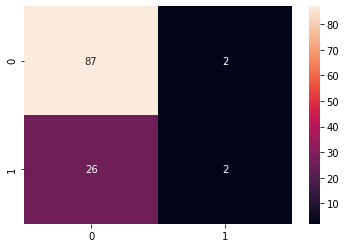

In [92]:
cn = metrics.confusion_matrix(y_test,y_pred)
sn.heatmap(cn,annot=True)

In [95]:
report = metrics.classification_report(y_test,y_pred)
print("\n",report)


               precision    recall  f1-score   support

           1       0.77      0.98      0.86        89
           2       0.50      0.07      0.12        28

    accuracy                           0.76       117
   macro avg       0.63      0.52      0.49       117
weighted avg       0.71      0.76      0.69       117



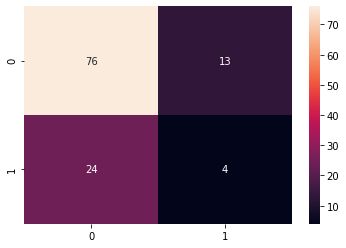

In [97]:
cn = metrics.confusion_matrix(y_test,y_pred1)
sn.heatmap(cn,annot=True)

In [98]:
import pickle

In [99]:
file = open('liver.pkl','wb')
pickle.dump(lr,file)
file.close()